In [20]:
import math
import numpy as np
import random
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
user_movies_dict = {}

user_id movie_id rating timestamp 

In [3]:
file = open("/Users/droidx/Desktop/Data mining tech/Social mining/ml-100k/u.data", 'r')
for line in file:
    parts = line.split()
    if parts[0] in user_movies_dict:
        user_movies_dict[parts[0]][parts[1]] = parts[2]
    else:
        user_movies_dict[parts[0]] = {}
        user_movies_dict[parts[0]][parts[1]] = parts[2]

In [4]:
def percent_of_matches(user1, user2, user_movies_dict):
    matches = 0
    for movie in user_movies_dict[user1]:
        if movie in user_movies_dict[user2]:
            if user_movies_dict[user1][movie] == user_movies_dict[user2][movie]:
                matches += 1
    return matches / len(user_movies_dict[user1])

In [5]:
user_similarity_matrix = np.zeros((944,944))
for user1 in range(1,944):
    for user2 in range(1, 944):
        user_similarity_matrix[user1][user2] = percent_of_matches(str(user1), str(user2), user_movies_dict)

In [6]:
user_rating_matrix = np.zeros((944,1683))
for user in user_movies_dict:
    for movie in user_movies_dict[user]:
        user_rating_matrix[int(user)][int(movie)] = user_movies_dict[user][movie]

In [16]:
def predict(k, user_movies_dict, user_similarity_matrix, test_users):
    user_rating_predicted_matrix = np.zeros((944, 1683))
    for user in user_movies_dict:
        for movie in user_movies_dict[user]:
            user_rating_predicted_matrix[int(user)][int(movie)] = user_rating_matrix[int(user)][int(movie)]
    for user in test_users:
        most_similar_users = user_similarity_matrix[user].argsort()[::-1][:k]
        for movie in user_movies_dict[str(user)]:
            rating = 0
            count = 0
            for similar_user in most_similar_users:
                if movie in user_movies_dict[str(similar_user)] and str(similar_user) != str(user):
                    count += 1
                    rating += int(user_movies_dict[str(similar_user)][movie])
            if count != 0:
                user_rating_predicted_matrix[user][int(movie)] = rating/count
    return mean_squared_error(user_rating_matrix, user_rating_predicted_matrix)

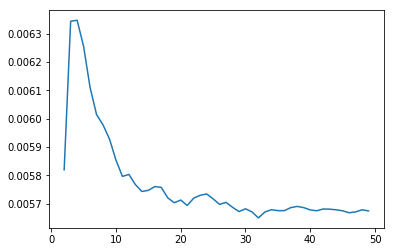

In [26]:
test_users = random.sample(range(1, 943), 100)
mses = []
ks = []
for k in range(2,50):
    mses.append(predict(k, user_movies_dict, user_similarity_matrix, test_users))
    ks.append(k)
plt.plot(ks, mses)
plt.show()

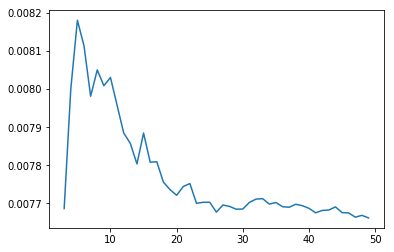

In [27]:
test_users = random.sample(range(1, 943), 100)
mses = []
ks = []
for k in range(3,50):
    mses.append(predict(k, user_movies_dict, user_similarity_matrix, test_users))
    ks.append(k)
plt.plot(ks, mses)
plt.show()